In [5]:
# !pip install opencv-python

    100% |████████████████████████████████| 25.4MB 2.5MB/s eta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
import time
import os
from random import random
import multiprocessing as mp
from PIL import Image
import glob
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
import numpy as np
import cv2
import random

In [24]:
def show_img(im, figsize=None, ax=None):
    """ Mostra uma imagem e retorna o ax """
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    plt.grid(False)
    return ax

def open_image(fn, gray=True):
    """ Opens an image using OpenCV given the file path.

    Arguments:
        fn: the file path of the image

    Returns:
        The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """

    flags = 0
    if not gray:
        flags = cv2.IMREAD_UNCHANGED + cv2.IMREAD_ANYDEPTH + cv2.IMREAD_ANYCOLOR

    if not os.path.exists(fn) and not str(fn).startswith("http"):
        raise OSError('No such file or directory: {}'.format(fn))
    elif os.path.isdir(fn) and not str(fn).startswith("http"):
        raise OSError('Is a directory: {}'.format(fn))
    else:
        try:
            if str(fn).startswith("http"):
                req = urllib.urlopen(str(fn))
                image = np.asarray(bytearray(req.read()), dtype="uint8")
                im = cv2.imdecode(image, flags).astype(np.float32) / 255.0
            else:
                im = cv2.imread(str(fn), flags).astype(np.float32) / 255.0
            if im is None: raise OSError(f'File not recognized by opencv: {fn}')
            if not gray:
                return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            return im
        except Exception as e:
            raise OSError('Error handling image at: {}'.format(fn)) from e

In [28]:
img = open_image("datasets/jonlenes/train/sample_1.jpg", False)

In [29]:
img.shape

(256, 512, 3)

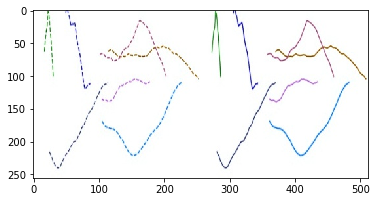

In [30]:
show_img(img)

In [22]:
!nvidia-smi

Mon Dec 17 11:34:38 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:1E.0 Off |                    0 |
| N/A   56C    P0   166W / 300W |   1925MiB / 16130MiB |     93%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  